In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def func(X, b = 20, q = 0.1, w = 10):
    return b*(1-np.exp(-0.5*w*(X[0]**2+X[1]**2))) + 0.5*q*(-X[0]**3 + X[1])**2

def gradx(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2+X[1]**2)) *w*X[0] - 3*q*X[0]**2*(-X[0]**3 + X[1])

def grady(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2 + X[1]**2))*w*X[1] + q*(-X[0]**3 + X[1])

def grad(X):
    return [gradx(X), grady(X)]

In [3]:
print(func([0.2,0.2]))

6.595442279287216


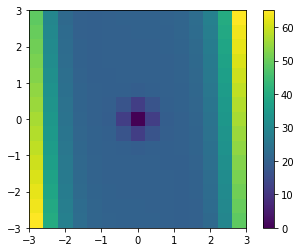

In [4]:
x = np.linspace(-3, 3, 15)
y = np.linspace(-3, 3, 15)

X = np.meshgrid(x, y)
plt.imshow(func(X), extent=[-3, 3, -3, 3])
plt.colorbar()
plt.show()

In [5]:
# Vanilla GD
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# Momentum GD
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# NAG
def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#RMS_PROP
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
#ADAM                       
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

In [7]:
def minResults(x,y,eta,epochs,minfunc):
    Results = pd.DataFrame()
    count = 0
    for i in x:
        count += 1
        print(count)
        for j in y:
            Xf = minfunc(grad, np.array([i,j]), eta = eta, n_epochs = epochs)
            Results[str(i) + " " + str(j)] = func(Xf.T)
    return Results

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


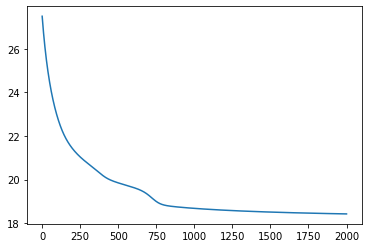

In [11]:
Resultsgd = minResults(x, y, 10**(-4), 2000, gd)

Resultsgd['mean'] = Resultsgd.mean(axis=1)
plt.plot(np.arange(len(Resultsgd['mean'])), Resultsgd['mean'])
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


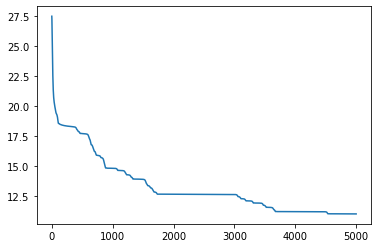

In [25]:
Resultsgd_ = minResults(x, y, 10**(-3), 2000, gd)

Resultsgd['mean'] = Resultsgd.mean(axis=1)
plt.plot(np.arange(len(Resultsgd['mean'])), Resultsgd['mean'])
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


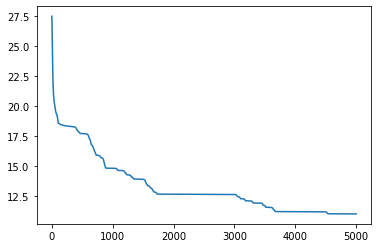

In [26]:
Results_NAG = pd.DataFrame()
count = 0
for i in x:
    count += 1
    print(count)
    for j in y:
        Xf = NAG(grad, np.array([i,j]), eta = 10**(-4))
        Results_NAG[str(i) + " " + str(j)] = func(Xf.T)

Results_NAG['mean'] = Results_NAG.mean(axis=1)
plt.plot(np.arange(5001), Results_NAG['mean'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


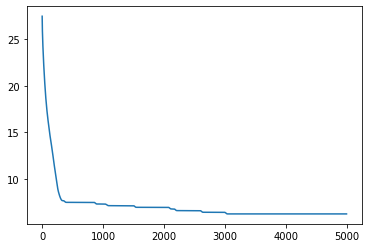

In [27]:
Results_rms = pd.DataFrame()
count = 0
for i in x:
    count += 1
    print(count)
    for j in y:
        Xf = rms_prop(grad, np.array([i,j]), eta = 10**(-2))
        Results_rms[str(i) + " " + str(j)] = func(Xf.T)

Results_rms['mean'] = Results_rms.mean(axis=1)
plt.plot(np.arange(5001), Results_rms['mean'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


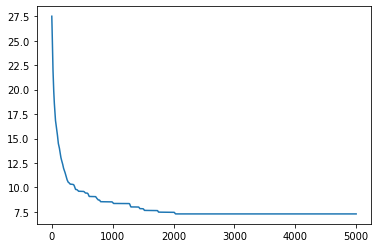

In [28]:
Results_adams = pd.DataFrame()
count = 0
for i in x:
    count += 1
    print(count)
    for j in y:
        Xf = adams(grad, np.array([i,j]), eta = 10**(-2))
        Results_adams[str(i) + " " + str(j)] = func(Xf.T)

Results_adams['mean'] = Results_adams.mean(axis=1)
plt.plot(np.arange(5001), Results_adams['mean'])